<a href="https://colab.research.google.com/github/haein0224/Study_machinelearning/blob/main/%EC%9D%8C%EC%84%B1%EB%B6%84%EB%A5%98%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 음성 분류 경진대회 EDA

### 1. 분석환경 준비

In [1]:
import librosa
import librosa.display as dsp
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

### 2. CSV 파일 EDA

In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/user_data/train.csv')
train.head()

,file_name,label
0,001.wav,9
1,002.wav,0
2,004.wav,1
3,005.wav,8
4,006.wav,0


In [6]:
train.shape
# 400행 3열

(400, 2)

In [9]:
print(train.label.unique())
train.label.groupby(train.label).count()
각각은 40개씩 균일하게 분포하고 있음

[9 0 1 8 7 4 5 2 6 3]


label
0    40
1    40
2    40
3    40
4    40
5    40
6    40
7    40
8    40
9    40
Name: label, dtype: int64

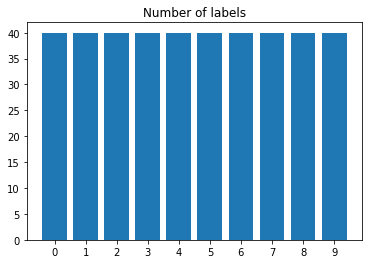

In [15]:
X = train.label.groupby(train.label).count().index ### ?
Y = train.label.groupby(train.label).count()

plt.bar(X,Y)
plt.xticks(X)
plt.title('Number of labels')
plt.show()

### 3. WAV 파일 EDA

In [24]:
# 오디오 시각화

# 함수 정의
def get_audio(num=0) :
  # Audio Sample Directory
  sample = os.listdir('/content/drive/MyDrive/Colab Notebooks/user_data/train')
  temp = train[train.label == num].file_name # train csv 파일을 이용해 label과 매치되는 file명을 가져옴
  file_name = temp[temp.index[0]] # 그 중에서 첫번째 데이터를 불러와 듣고자함

  file = '/content/drive/MyDrive/Colab Notebooks/user_data/train/' + file_name

  # Get Audio from the location
  data, sample_rate = librosa.load(file) 
  ## librosa를 이용해 데이터를 load 하면 두가지지 output이 나옴
  ## 1) array 형식으로된 data, 숫자형으로된 sample_rate

  # Plot the audio wave
  dsp.waveshow(data,sr=sample_rate)
  plt.show()

  # Show the widget
  return Audio(data=data, rate=sample_rate)


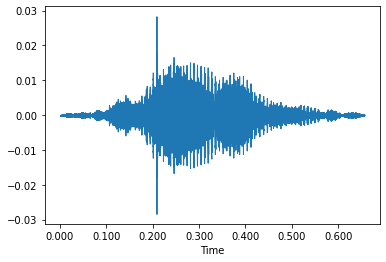

In [25]:
# 숫자 0 음성
get_audio(0)

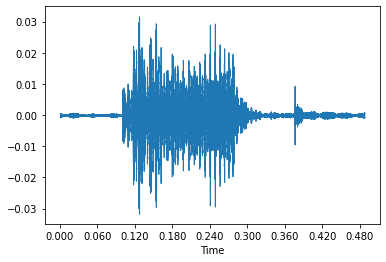

In [26]:
get_audio(8)

### 4. 퓨리에 변환

음성 데이터를 분석하기 위하여 주파수(frequency)를 성분을 뽑아내야 한다면 퓨리에 변환(Fourier Transform)을 해야함
(입력 신호를 다양한 주파수를 가지는 주기함수들로 분해하는 것 -> 이를 통해 음성데이터에서 실제제 유용한 소리를 추출)

In [ ]:
def fourier_transform(num=0) :
  # Audio Sample Directory
  sample = os.listdir()